# Climate change 
by Rajat Jhalani

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display

In [3]:
data = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')

In [4]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
data['Latitude_Num'] = pd.to_numeric(data['Latitude'].str[:-1])  * (-1 if 'S' in data['Latitude'].str[-1] else 1)
data['Longitude_Num'] = pd.to_numeric(data['Longitude'].str[:-1]) * (-1 if 'W' in data['Longitude'].str[-1] else 1)

In [10]:
# for when we are debugging/testing possible visualizations -- downsampling
nsample = 10000
downSampleMask = np.random.choice(range(len(data)), nsample, replace=False)

In [11]:
dataDS = data.loc[downSampleMask]
dataDS

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Latitude_Num,Longitude_Num
59499,1873-01-01,-6.948,2.482,Dalian,China,39.38N,120.69E,39.38,120.69
35383,1856-07-01,27.859,1.322,Cairo,Egypt,29.74N,31.38E,29.74,31.38
87368,1930-12-01,22.659,0.487,Hyderabad,India,16.87N,78.70E,16.87,78.70
183648,2001-11-01,25.918,0.389,Rangoon,Burma,16.87N,95.44E,16.87,95.44
224248,1922-03-01,5.228,1.082,Tangshan,China,37.78N,113.90E,37.78,113.90
...,...,...,...,...,...,...,...,...,...
14767,1994-07-01,22.721,0.414,Ankara,Turkey,39.38N,33.29E,39.38,33.29
16609,1953-04-01,22.121,0.277,Baghdad,Iraq,32.95N,45.00E,32.95,45.00
91638,1859-02-01,4.438,1.336,Istanbul,Turkey,40.99N,29.82E,40.99,29.82
181171,2013-03-01,26.849,0.276,Pune,India,18.48N,74.37E,18.48,74.37


In [13]:
@ipywidgets.interact(xaxis=['Latitude_Num', 'Longitude_Num', 'City', 'Country'], yaxis=['Latitude_Num', 'Longitude_Num', 'City', 'Country'])
def make_plot(xaxis, yaxis):
    fig = plt.scatter(data[xaxis], data[yaxis], c=data['AverageTemperature'])
    plt.show()

interactive(children=(Dropdown(description='xaxis', options=('Latitude_Num', 'Longitude_Num', 'City', 'Country…

In [15]:
@ipywidgets.interact(city=['Delhi', 'Xian'])
#                      , yaxis=['Latitude_Num', 'Longitude_Num', 'City', 'Country']
def make_plot(city):
#     fig = plt.scatter(data[xaxis], data[yaxis], c=data['AverageTemperature'])
#     plt.show()

        fig, ax = plt.subplots(figsize=(20,5))
        data_city = data[data['City'] == city]
        plt.plot(data_city['dt'], data_city['AverageTemperature'])
        plt.show()

interactive(children=(Dropdown(description='city', options=('Delhi', 'Xian'), value='Delhi'), Output()), _dom_…

In [22]:
cities = np.unique(data['City'])
mean_temp = []
for city in cities:
    mean_temp.append(data[data['City'] == city]['AverageTemperature'].mean())
    
# mean_temp



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


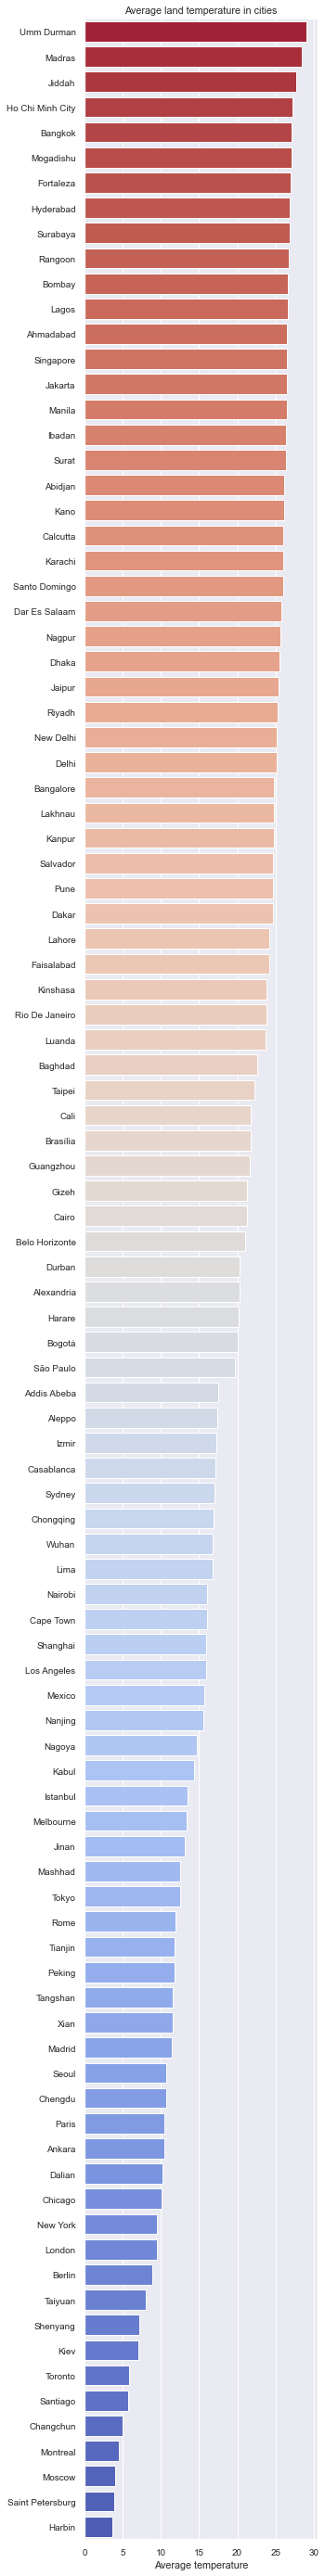

In [23]:
mean_temp_bar, cities_bar = (list(x) for x in zip(*sorted(zip(mean_temp, cities), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(cities))
sns.barplot(mean_temp_bar, cities_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in cities')

In [24]:

temp = data.groupby(["Country" , "City"]).mean()
hottest = temp.sort_values(["AverageTemperature"] , ascending=False)[:20]
hottest = hottest.sort_values(["AverageTemperature"] , ascending=True)
coldest = temp.sort_values(["AverageTemperature"] , ascending=True)[:20]
coldest = coldest.sort_values(["AverageTemperature"] , ascending=False)



Text(6, 17, '(Global average temprature)')

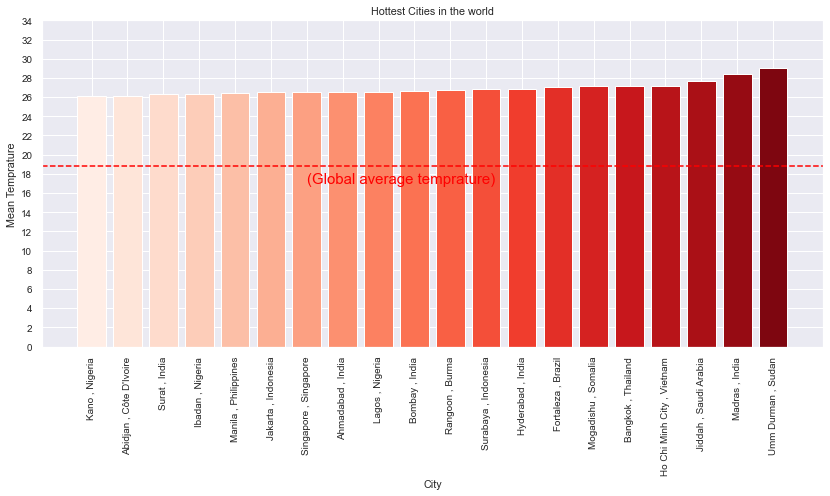

In [25]:
hottest_index = []
for i in hottest.index:
    cit = i[1] + " , " + i[0]
    hottest_index.append(cit)
    
coldest_index = []
for i in coldest.index:
    cit = i[1] + " , " + i[0]
    coldest_index.append(cit)
    
plt.figure(figsize=(14,6))

plt.bar(hottest_index , hottest.values[:,0]
        , color=sns.color_palette("Reds" , len(hottest) ))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,35,2))
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Mean Temprature")
plt.title("Hottest Cities in the world")
plt.text(6,17,"(Global average temprature)" , color="red" , fontsize=15 )



In [20]:
@ipywidgets.interact(city=['Delhi', 'Xian'], month = [5,6])
#                      , yaxis=['Latitude_Num', 'Longitude_Num', 'City', 'Country']
def make_plot(city, month):
    data['dt'] = pd.to_datetime(data['dt'])
    df_month = data[data['dt'].dt.month == month]
    delhi_may = df_month[df_month['City']==city]
    plt.plot(delhi_may['dt'], delhi_may['AverageTemperature'], )
    plt.show()

interactive(children=(Dropdown(description='city', options=('Delhi', 'Xian'), value='Delhi'), Dropdown(descrip…